In [222]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,mean_absolute_error,r2_score,mean_squared_error,silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/iriscsv/Iris.csv


In [261]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [262]:
df.shape

(150, 6)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [264]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [265]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [266]:
df[['Flower','Species']] = df['Species'].str.split('-',expand = True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Flower
0,1,5.1,3.5,1.4,0.2,setosa,Iris
1,2,4.9,3.0,1.4,0.2,setosa,Iris
2,3,4.7,3.2,1.3,0.2,setosa,Iris
3,4,4.6,3.1,1.5,0.2,setosa,Iris
4,5,5.0,3.6,1.4,0.2,setosa,Iris
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,Iris
146,147,6.3,2.5,5.0,1.9,virginica,Iris
147,148,6.5,3.0,5.2,2.0,virginica,Iris
148,149,6.2,3.4,5.4,2.3,virginica,Iris


In [267]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [268]:
df['Flower'].value_counts()

Iris    150
Name: Flower, dtype: int64

In [269]:
df = df.drop(['Id','Flower'],axis =1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [270]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [271]:
df['Species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [272]:
cols = df.columns

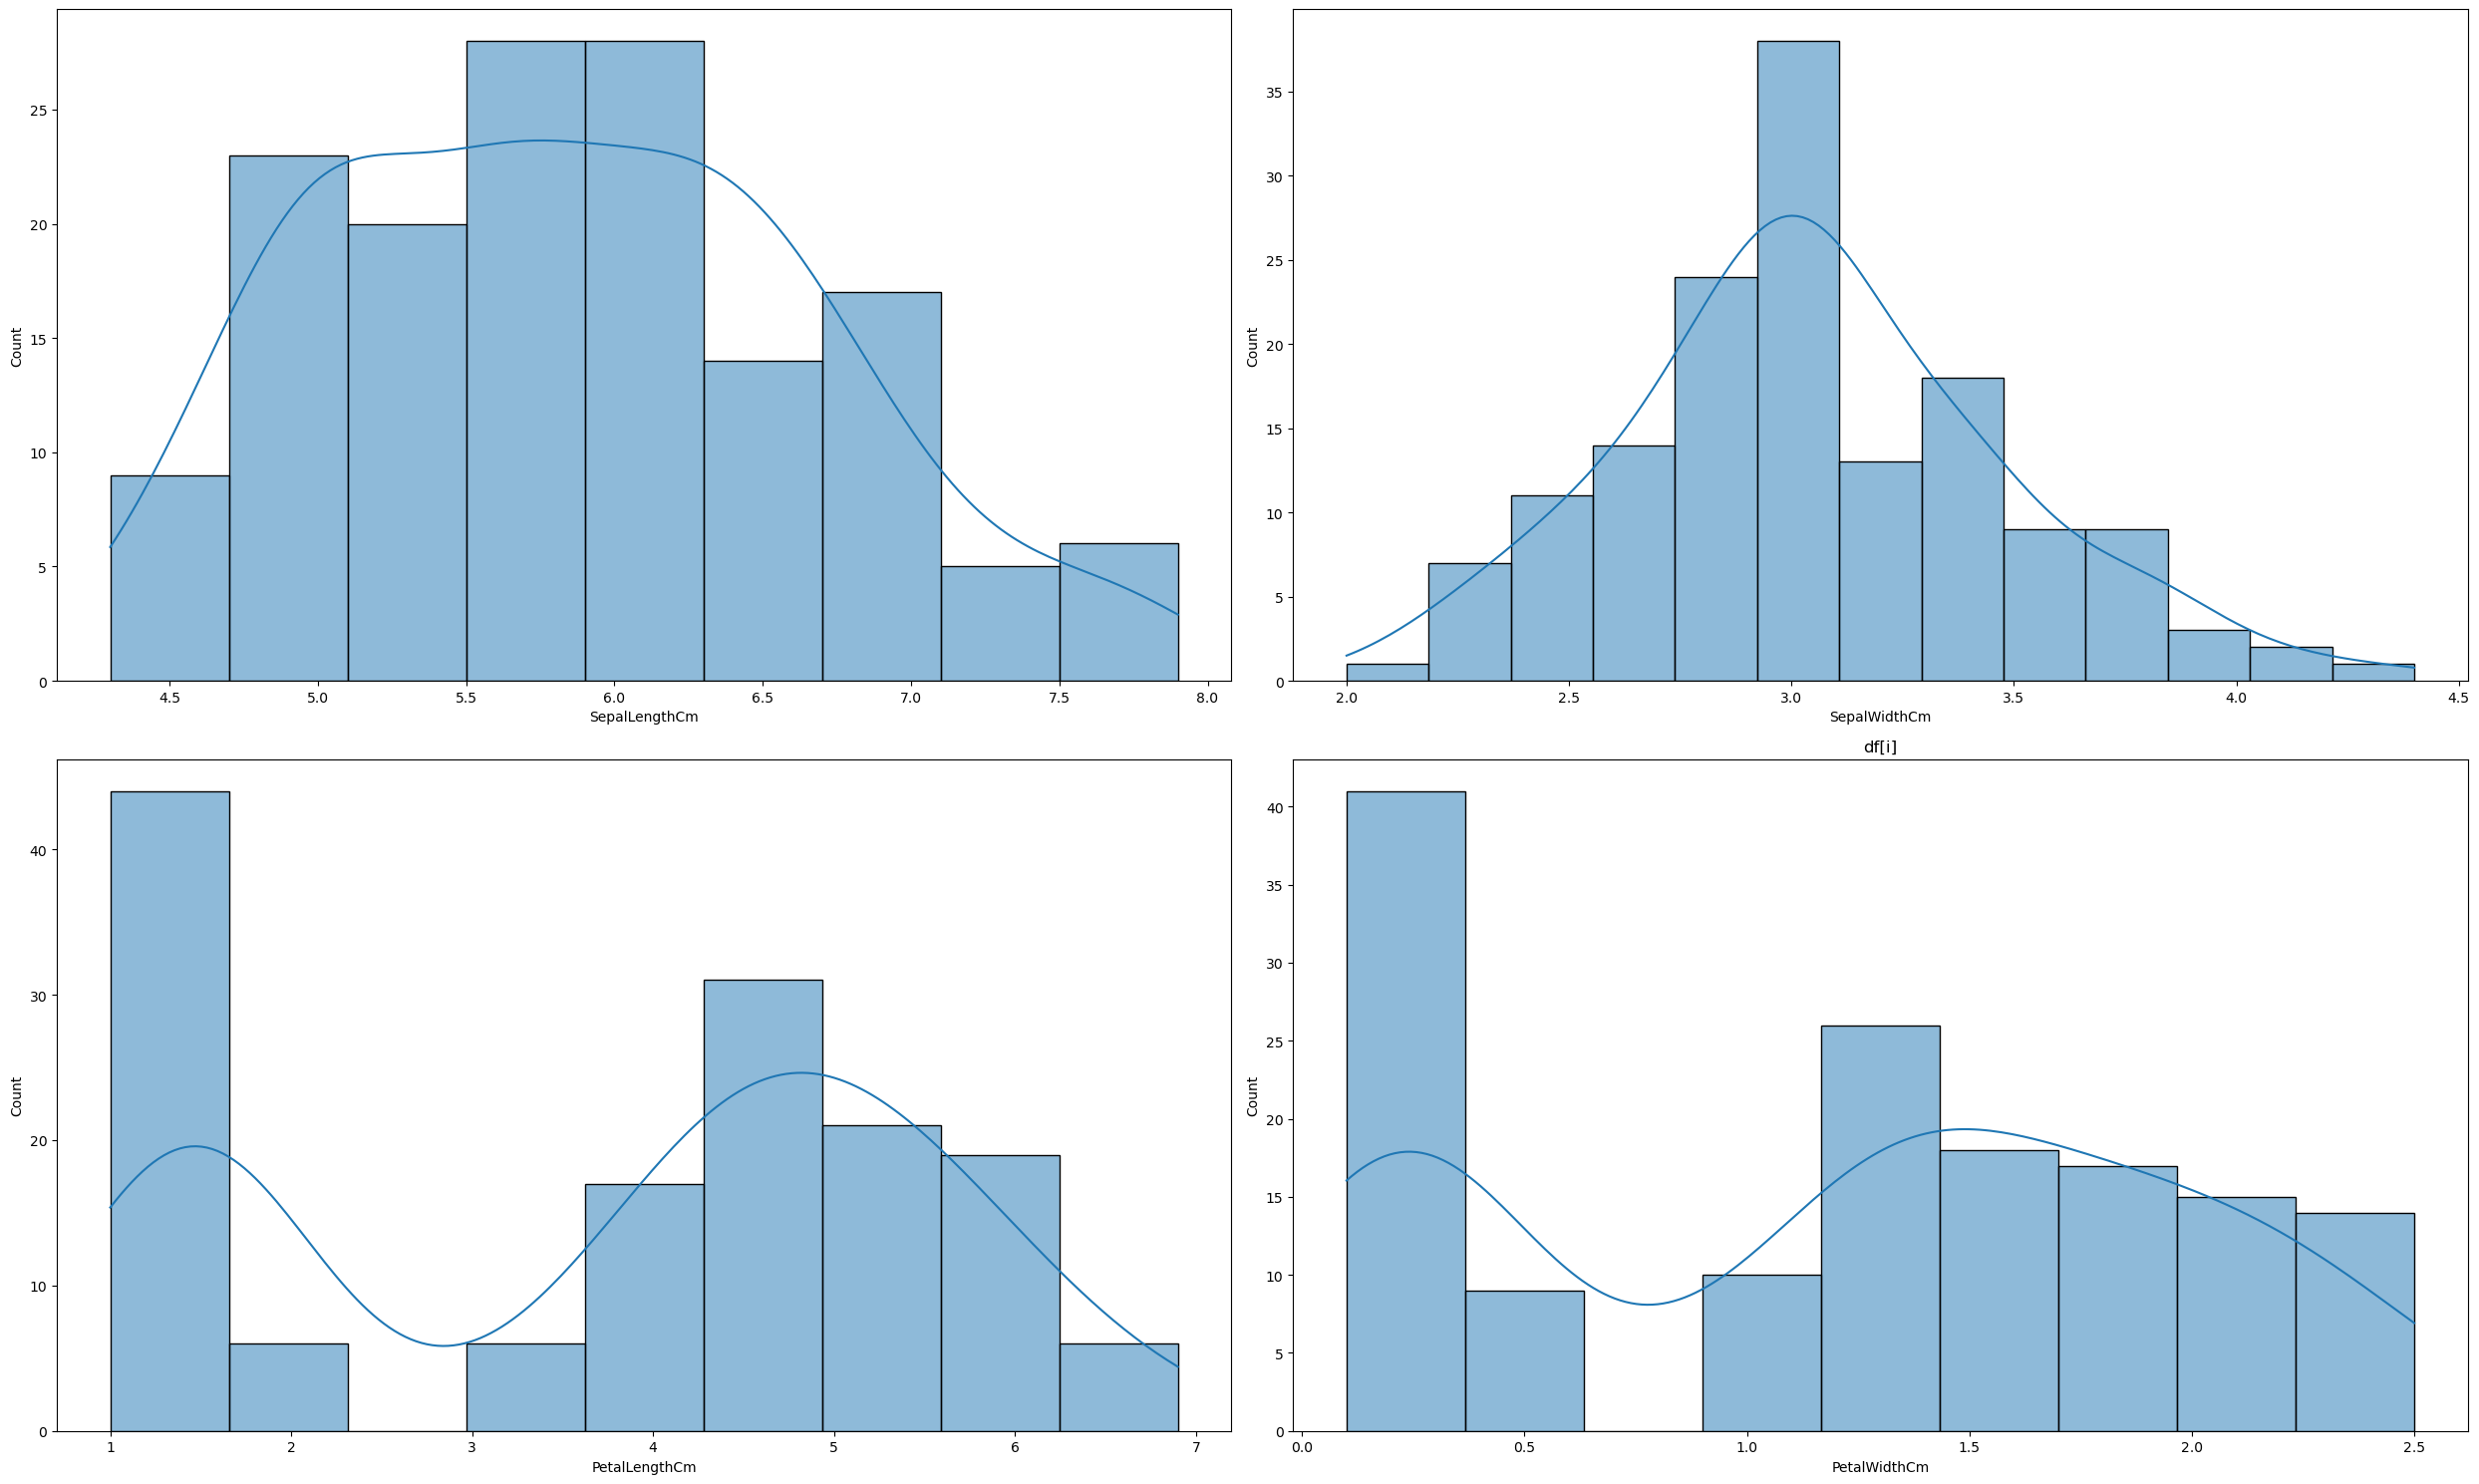

In [273]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

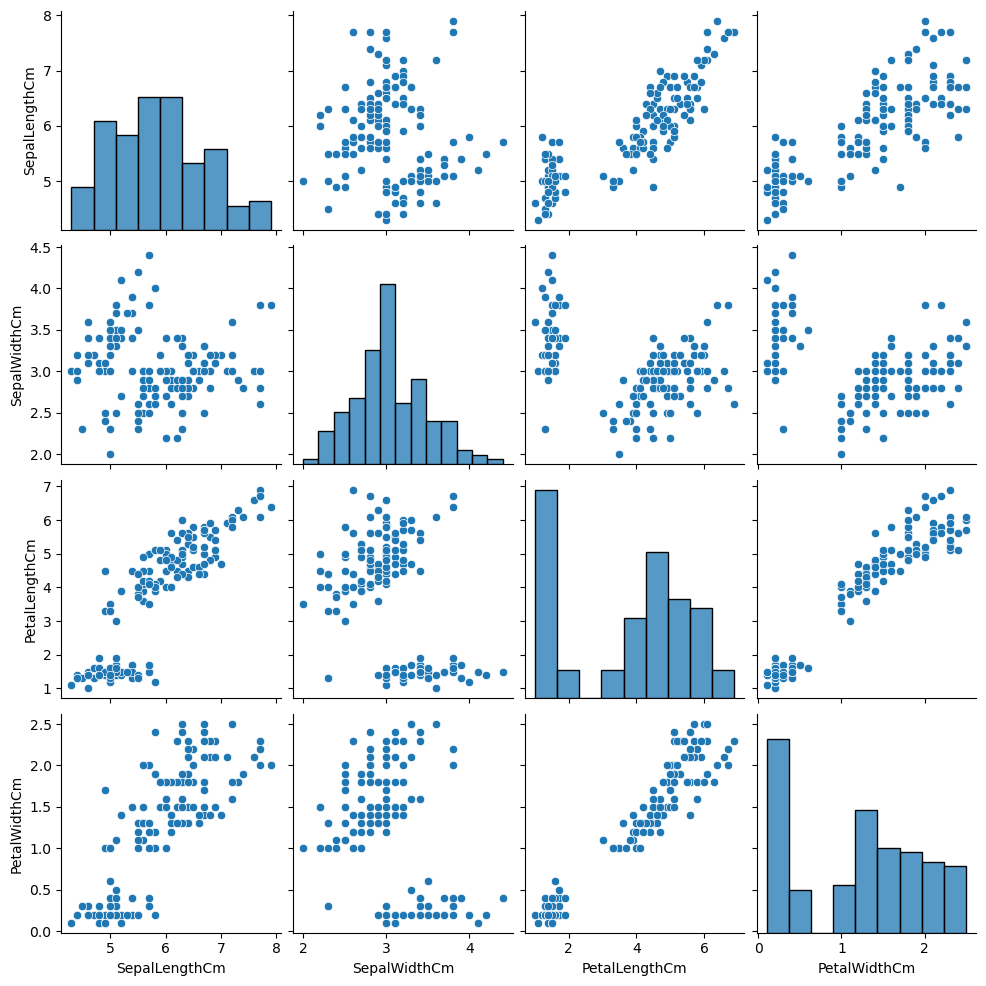

In [274]:
sns.pairplot(df)

<Axes: >

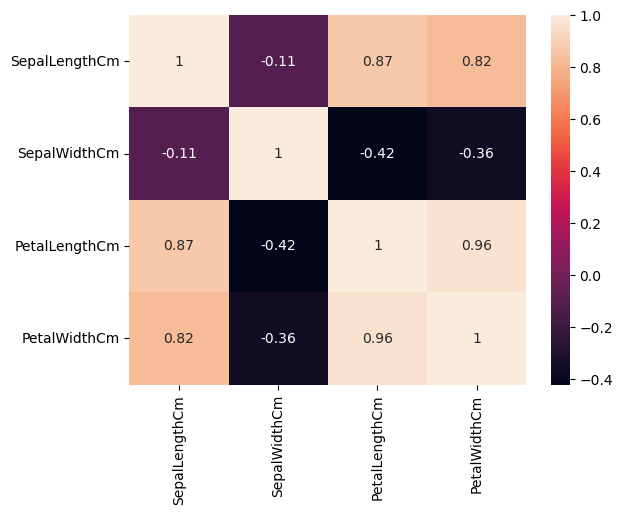

In [275]:
sns.heatmap(df.corr(),annot = True)

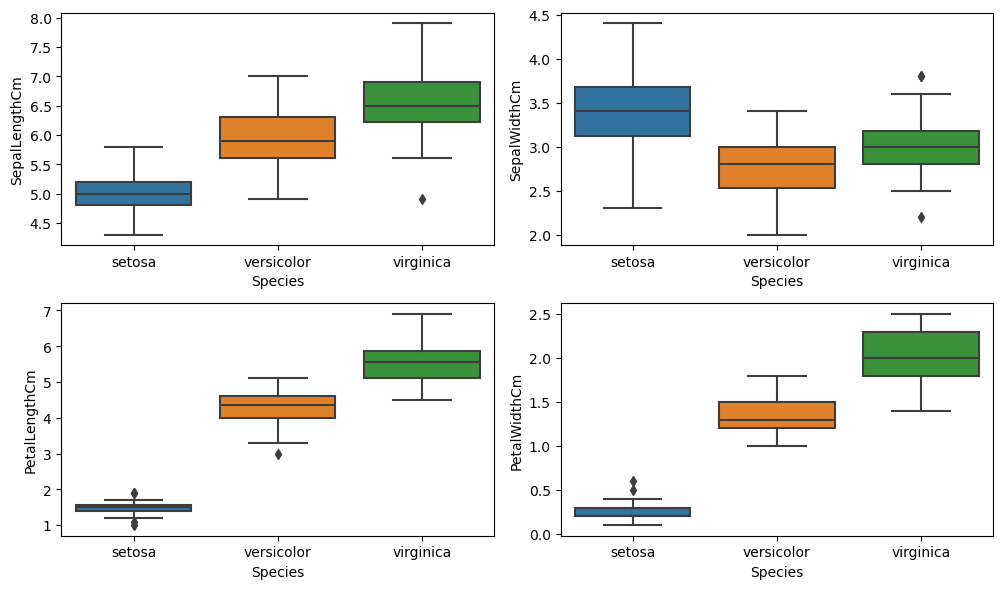

In [276]:
#there is high corelation between petalwidth and petallength and sepal length Create box plots for each feature by species
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.tight_layout()
plt.show()

<Axes: >

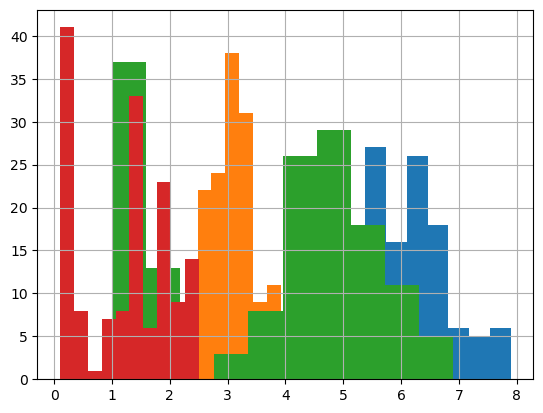

In [277]:
#Plotting the histogram of all features toghether
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

In [278]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Flower Size:

Flower Size Index: Compute a size index by combining the measurements of Petal Length, Petal Width, Sepal Length, and Sepal Width. For example, you can add them up or take the mean of these measurements to get an overall size index for each flower.

In [279]:
# Calculate the Flower Size Index
df['Size_Index'] = df['PetalLengthCm'] + df['PetalWidthCm'] + df['SepalLengthCm'] + df['SepalWidthCm']

Flower Shape:

Aspect Ratio: Calculate the aspect ratio of the petals and sepals, which is the ratio of their length to width. Higher aspect ratios indicate more elongated shapes, while lower aspect ratios indicate more rounded shapes.

In [280]:
# Calculate Aspect Ratios
df['Petal_Aspect_Ratio'] = df['PetalLengthCm'] / df['PetalWidthCm']
df['Sepal_Aspect_Ratio'] = df['SepalLengthCm'] / df['SepalWidthCm']


Shape Index: Compute a shape index by taking the ratio of Petal Length to Sepal Length. This will help indicate the relative elongation of the petals compared to the sepals.

In [281]:
# Calculate Shape Index
df['Shape_Index'] = df['PetalLengthCm'] / df['SepalLengthCm']


In [282]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Size_Index,Petal_Aspect_Ratio,Sepal_Aspect_Ratio,Shape_Index
0,5.1,3.5,1.4,0.2,setosa,10.2,7.000000,1.457143,0.274510
1,4.9,3.0,1.4,0.2,setosa,9.5,7.000000,1.633333,0.285714
2,4.7,3.2,1.3,0.2,setosa,9.4,6.500000,1.468750,0.276596
3,4.6,3.1,1.5,0.2,setosa,9.4,7.500000,1.483871,0.326087
4,5.0,3.6,1.4,0.2,setosa,10.2,7.000000,1.388889,0.280000
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,17.2,2.260870,2.233333,0.776119
146,6.3,2.5,5.0,1.9,virginica,15.7,2.631579,2.520000,0.793651
147,6.5,3.0,5.2,2.0,virginica,16.7,2.600000,2.166667,0.800000
148,6.2,3.4,5.4,2.3,virginica,17.3,2.347826,1.823529,0.870968


In [283]:
cols = df.columns
cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Size_Index', 'Petal_Aspect_Ratio', 'Sepal_Aspect_Ratio',
       'Shape_Index'],
      dtype='object')

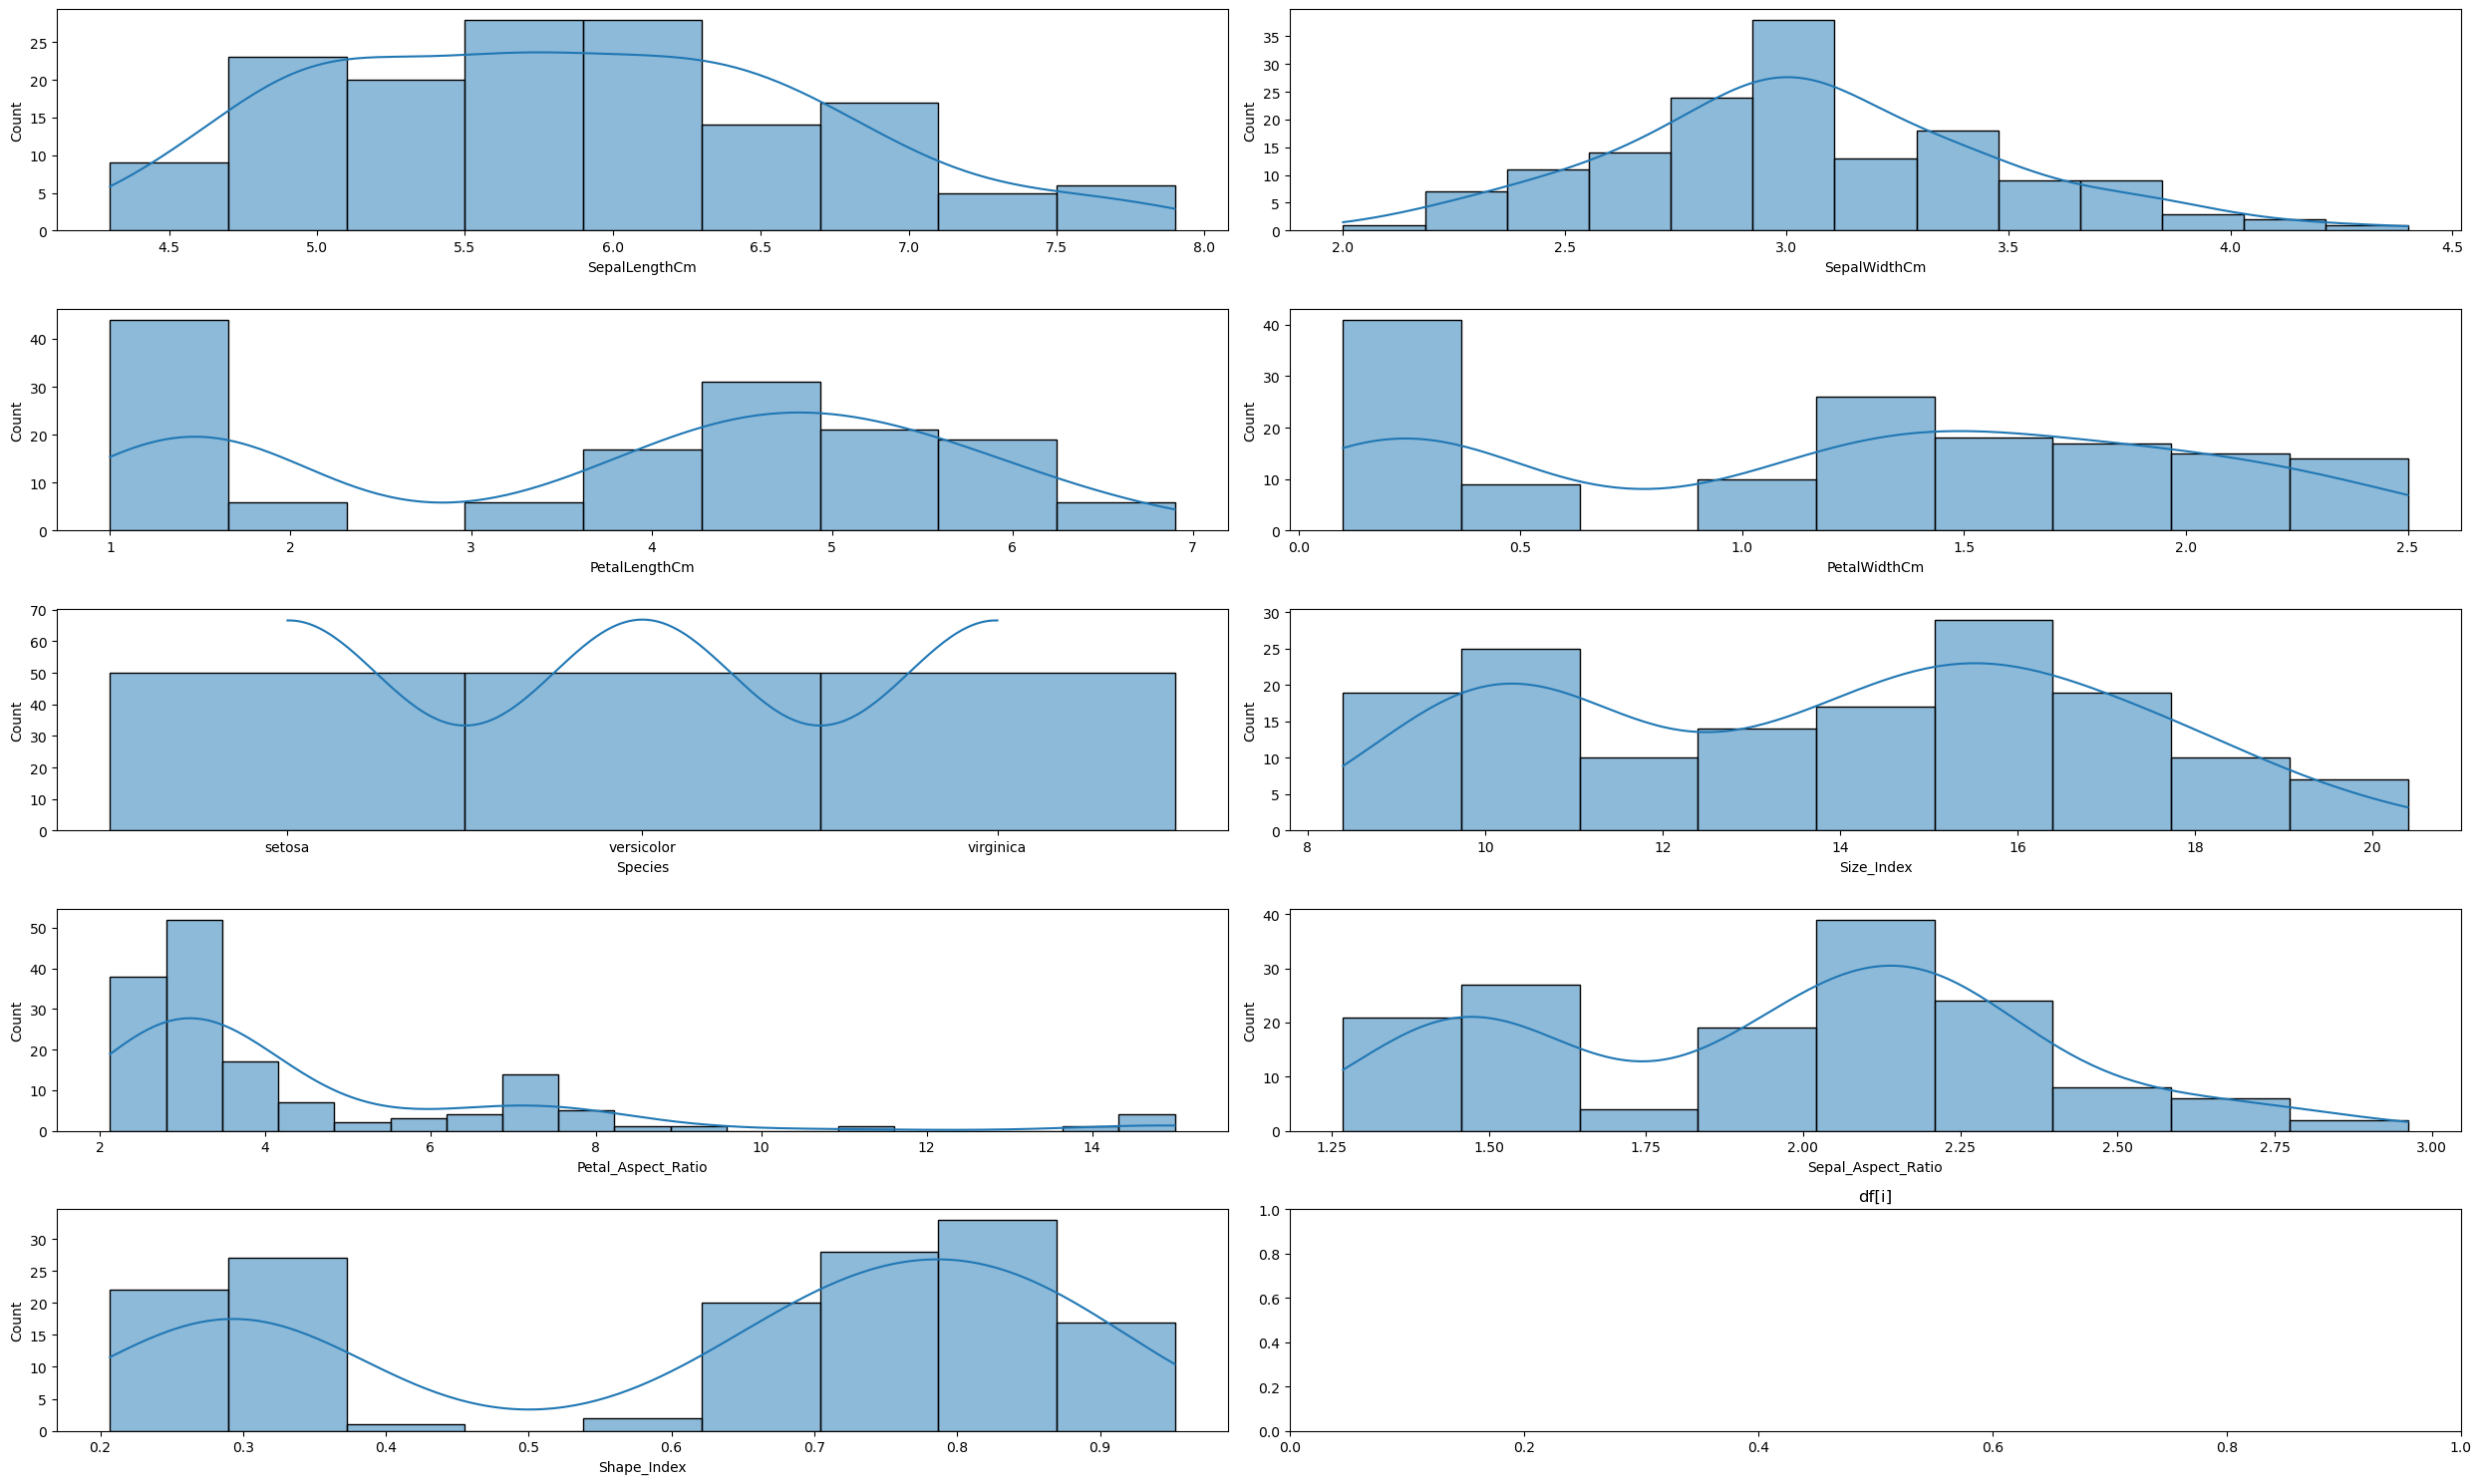

In [284]:

fig, ax= plt.subplots(5,2, figsize=(25,15))
for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [285]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Size_Index', 'Petal_Aspect_Ratio', 'Sepal_Aspect_Ratio',
       'Shape_Index'],
      dtype='object')

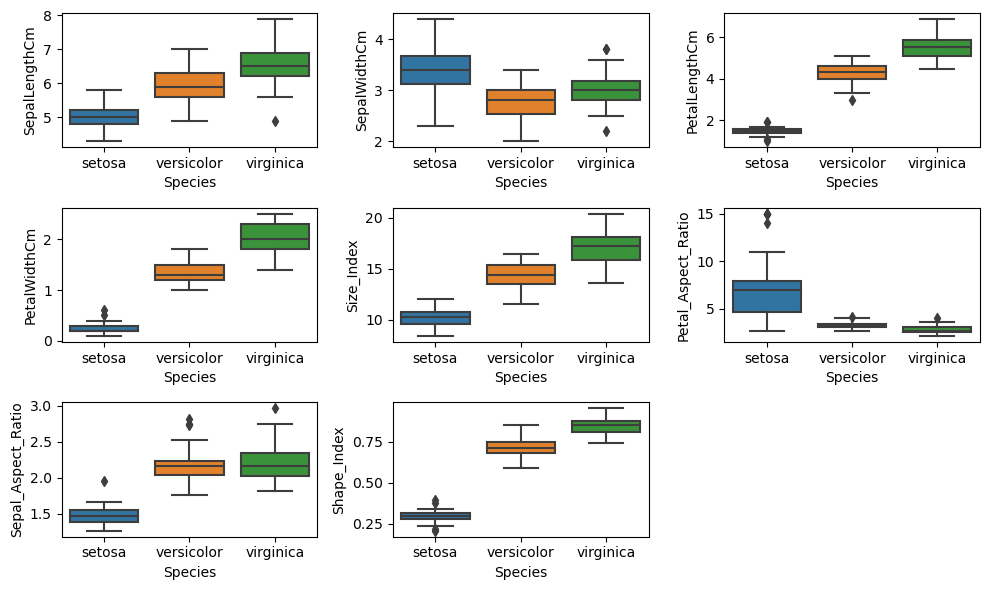

In [286]:
#there is high corelation between petalwidth and petallength and sepal length Create box plots for each feature by species
plt.figure(figsize=(10, 6))
plt.subplot(3, 3, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(3, 3, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.subplot(3, 3, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(3, 3, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.subplot(3, 3, 5)
sns.boxplot(x='Species', y='Size_Index', data=df)
plt.subplot(3, 3, 6)
sns.boxplot(x='Species', y='Petal_Aspect_Ratio', data=df)
plt.subplot(3, 3, 7)
sns.boxplot(x='Species', y='Sepal_Aspect_Ratio', data=df)
plt.subplot(3, 3, 8)
sns.boxplot(x='Species', y='Shape_Index', data=df)
plt.tight_layout()
plt.show()

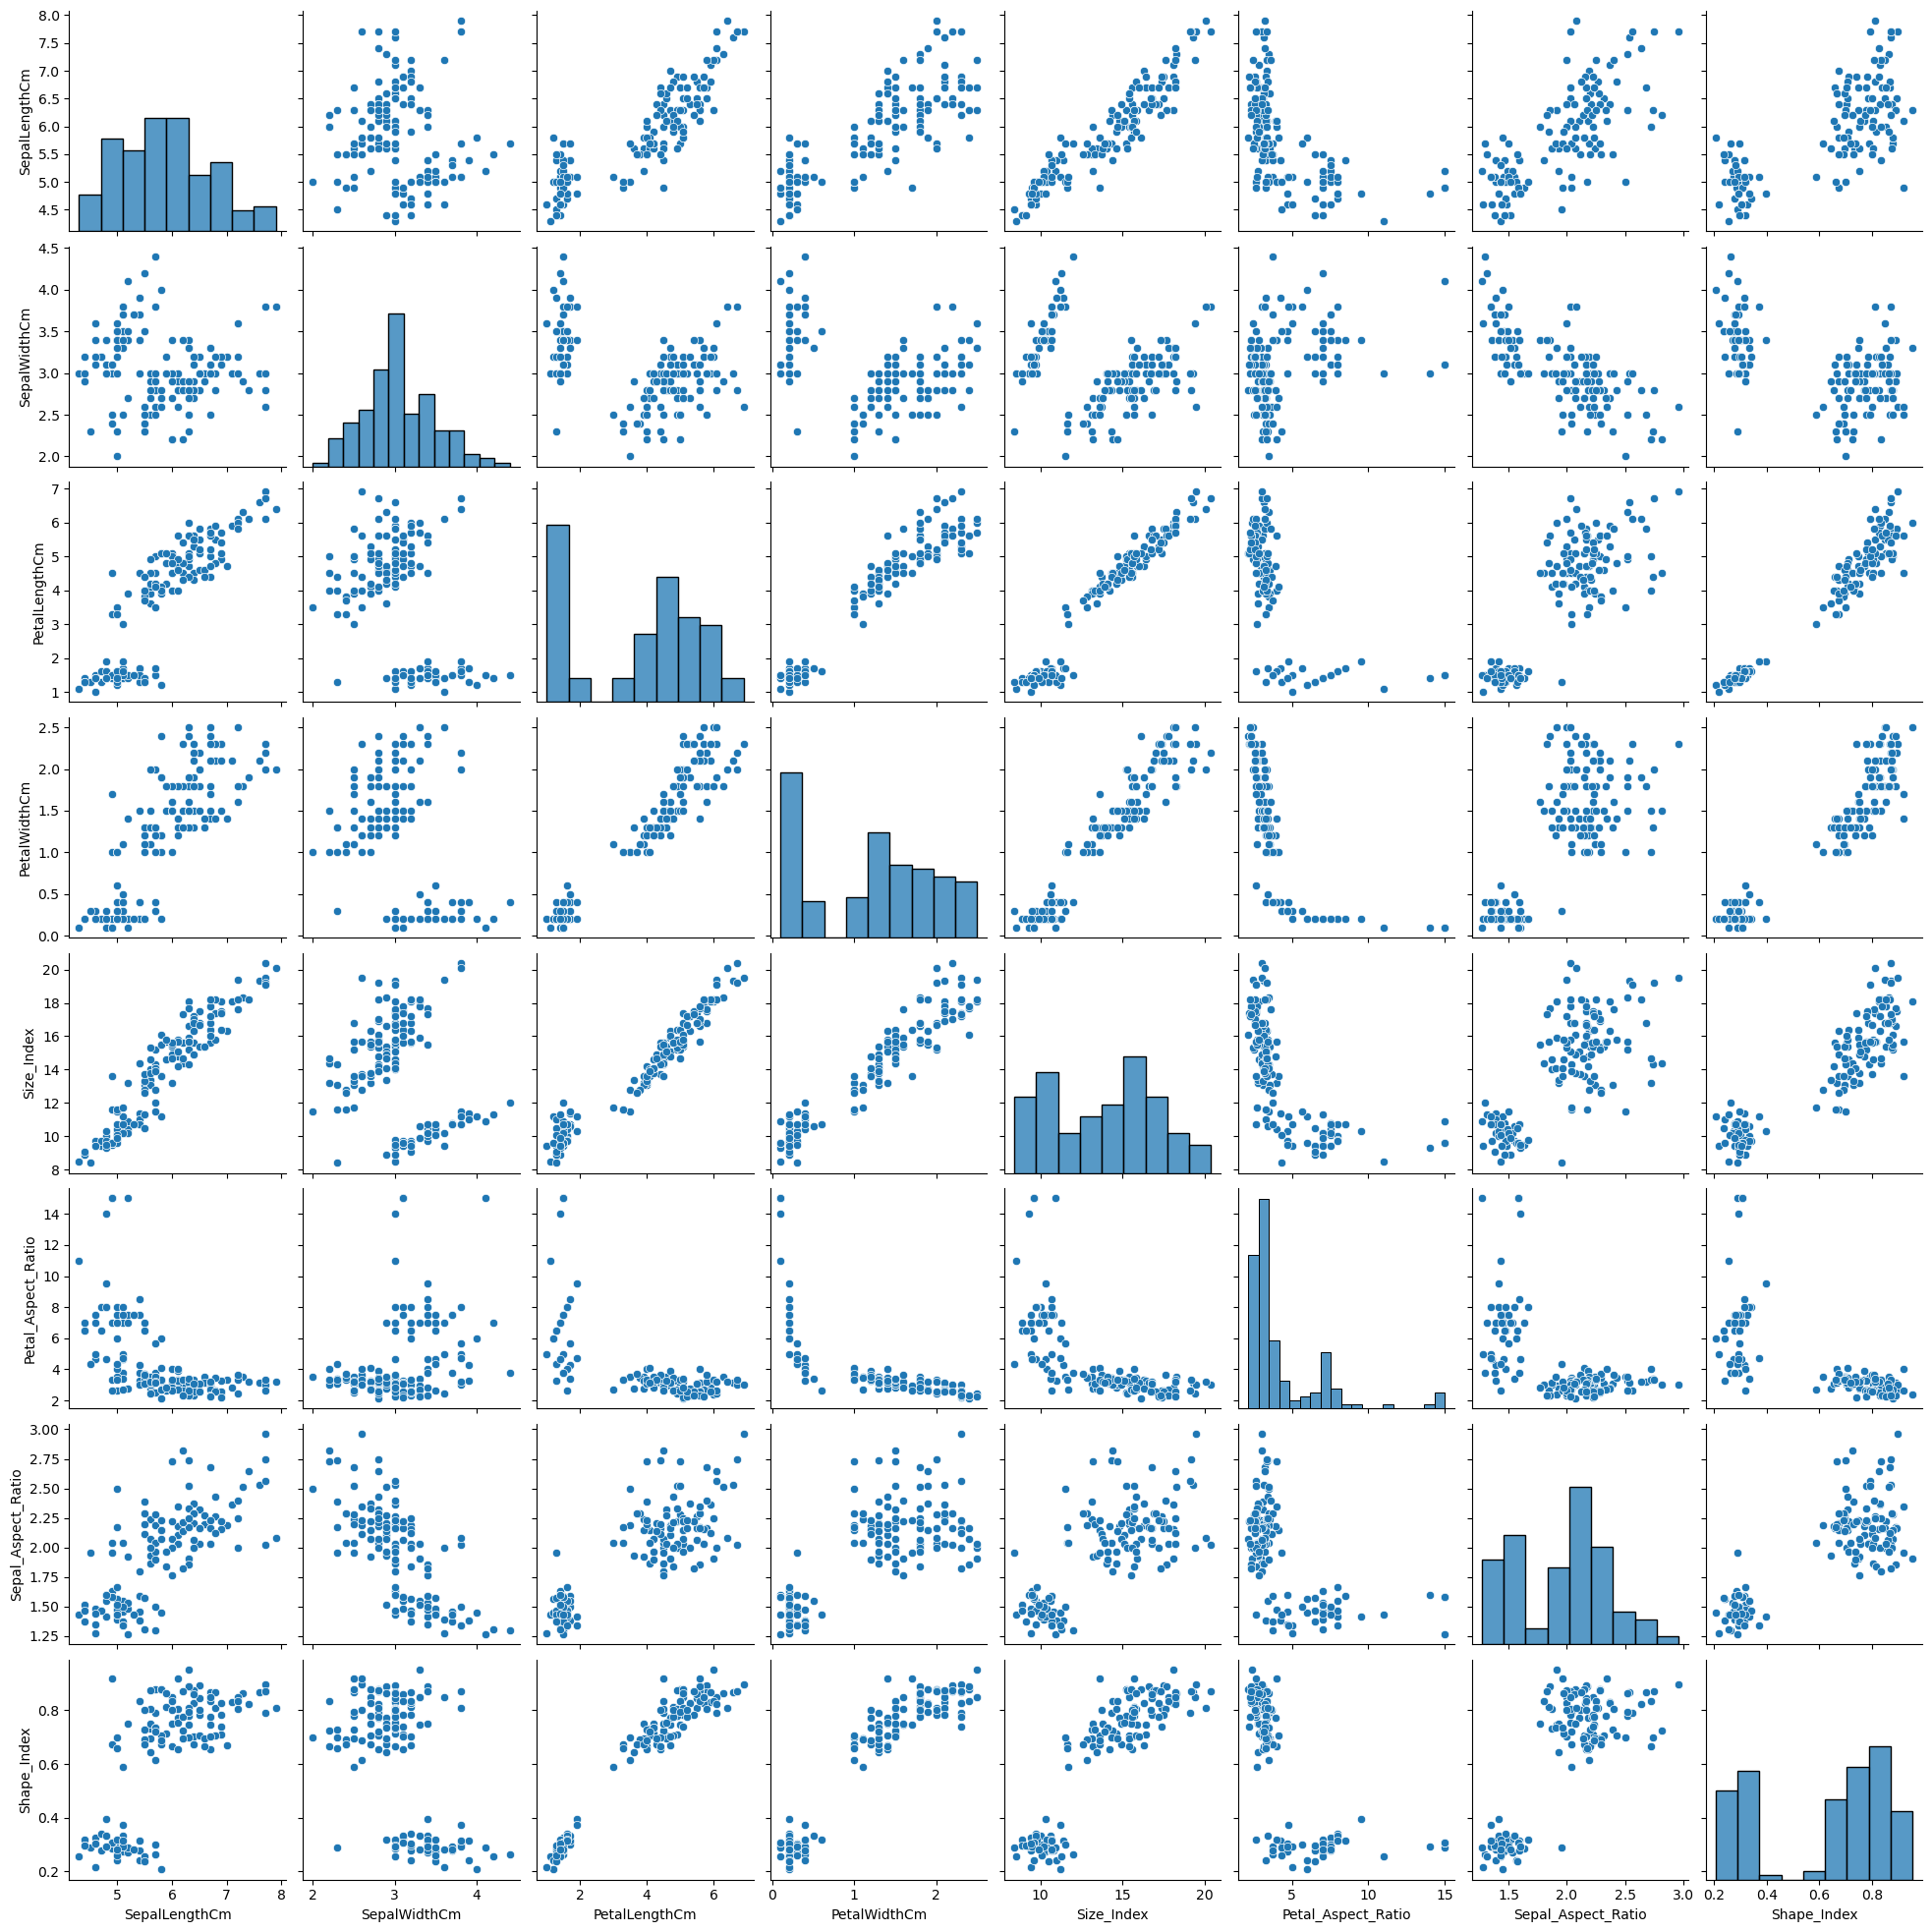

In [287]:
sns.pairplot(df)

<Axes: >

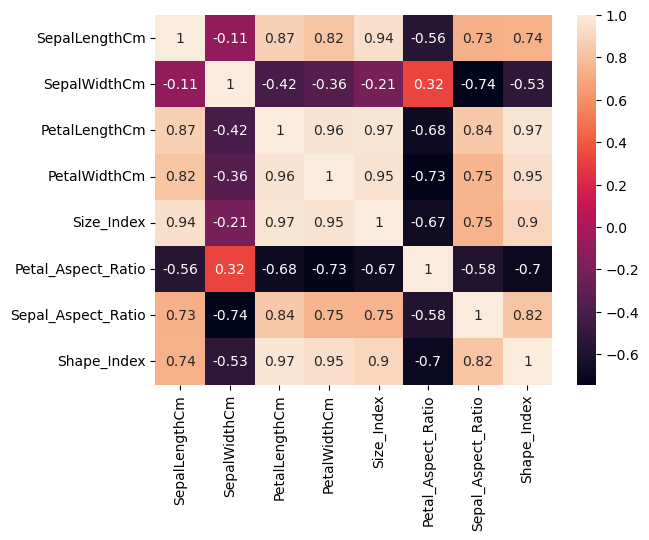

In [288]:
sns.heatmap(df.corr(),annot =True)

In [294]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical variable 'Color'
df['Species'] = label_encoder.fit_transform(df['Species'])


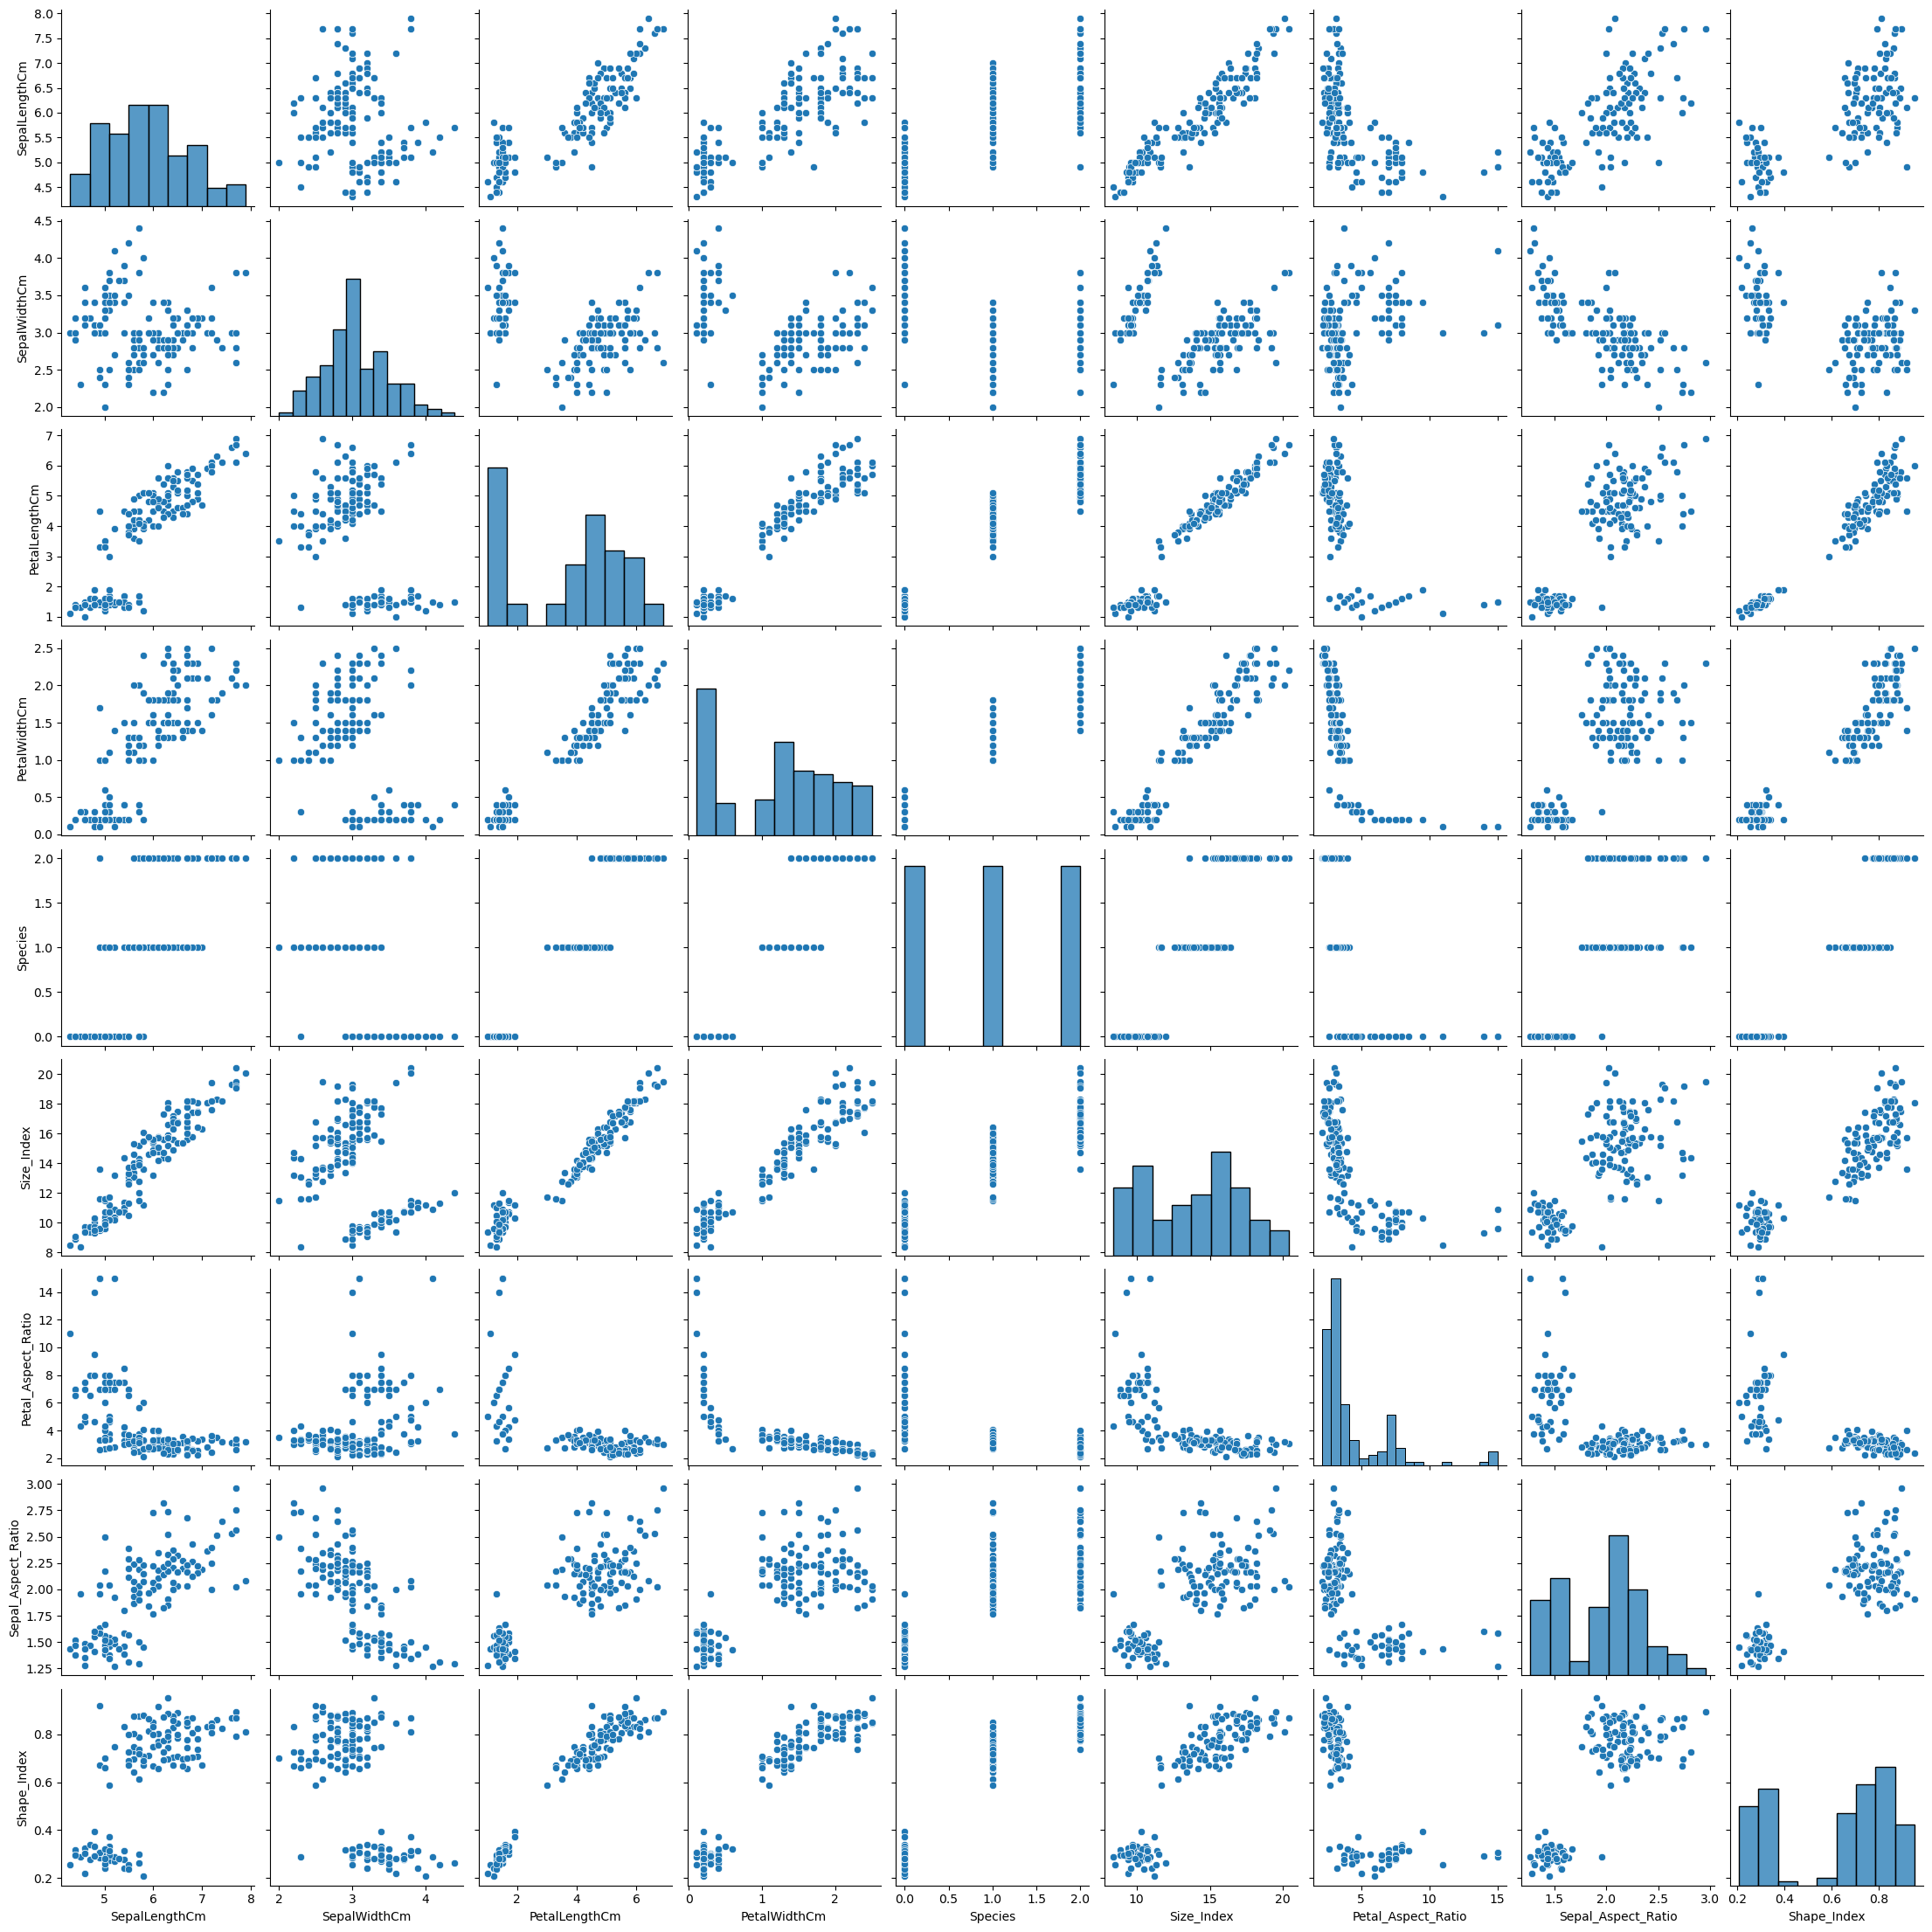

In [250]:
sns.pairplot(df)

In [301]:
X = df.drop('Species',axis =1)
y = df["Species"]
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Models that are going to be trained
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgboost.XGBRegressor(),
}

# Creating a function to train each regression model and calculate/return regression metrics
def train_reg(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Lists to store regression metrics
mae_s = []
mse_s = []
r2_s = []

# Train and evaluate regression models
for name, model in regression_models.items():
    mae, mse, r2 = train_reg(model, X_train, y_train, X_test, y_test)
    
    mae_s.append(mae)
    mse_s.append(mse)
    r2_s.append(r2)
scores_df = pd.DataFrame({"Algorithm": regression_models.keys(),"r2_score":r2_s,"mse": mse_s,'mae':mae_s})
scores_df

,Algorithm,r2_score,mse,mae
0,Linear Regression,0.941121,0.040823,0.149669
1,Decision Tree Regressor,0.951923,0.033333,0.033333
2,SVR,0.935250,0.044893,0.158065
3,Random Forest Regressor,0.952106,0.033207,0.055333
4,AdaBoost Regressor,0.903846,0.066667,0.066667
5,Gradient Boosting Regressor,0.948009,0.036047,0.059031
6,XGBoost Regressor,0.925890,0.051383,0.060611


In [302]:
scores_df['sqrt_of_mse'] = np.sqrt(scores_df['mse'])
scores_df

,Algorithm,r2_score,mse,mae,sqrt_of_mse
0,Linear Regression,0.941121,0.040823,0.149669,0.202047
1,Decision Tree Regressor,0.951923,0.033333,0.033333,0.182574
2,SVR,0.935250,0.044893,0.158065,0.211881
3,Random Forest Regressor,0.952106,0.033207,0.055333,0.182227
4,AdaBoost Regressor,0.903846,0.066667,0.066667,0.258199
5,Gradient Boosting Regressor,0.948009,0.036047,0.059031,0.189861
6,XGBoost Regressor,0.925890,0.051383,0.060611,0.226678


In [303]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test)
# Models that are going to be trained
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgboost.XGBRegressor(),
}

# Creating a function to train each regression model and calculate/return regression metrics
def train_reg(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Lists to store regression metrics
mae_s = []
mse_s = []
r2_s = []

# Train and evaluate regression models
for name, model in regression_models.items():
    mae, mse, r2 = train_reg(model, X_train_scaled, y_train, X_test_scaled, y_test)
    
    mae_s.append(mae)
    mse_s.append(mse)
    r2_s.append(r2)
# Assuming you have already scaled the features and trained the regression models
# Code for scaling the features and training the regression models (as shown in the previous response)

# Create the DataFrame
scal_scores_df = pd.DataFrame({
    "Algorithm": regression_models.keys(),
    "r2_score": r2_s,
    "mse": mse_s,
    "mae": mae_s,
    'sqrt_of_mse':np.sqrt(mse_s)
})

# Display the DataFrame
scal_scores_df

,Algorithm,r2_score,mse,mae,sqrt_of_mse
0,Linear Regression,0.941121,0.040823,0.149669,0.202047
1,Decision Tree Regressor,0.855769,0.100000,0.100000,0.316228
2,SVR,0.944164,0.038713,0.128323,0.196755
3,Random Forest Regressor,0.965236,0.024103,0.047000,0.155252
4,AdaBoost Regressor,0.959101,0.028357,0.032852,0.168394
5,Gradient Boosting Regressor,0.950700,0.034181,0.054351,0.184881
6,XGBoost Regressor,0.925890,0.051383,0.060611,0.226678


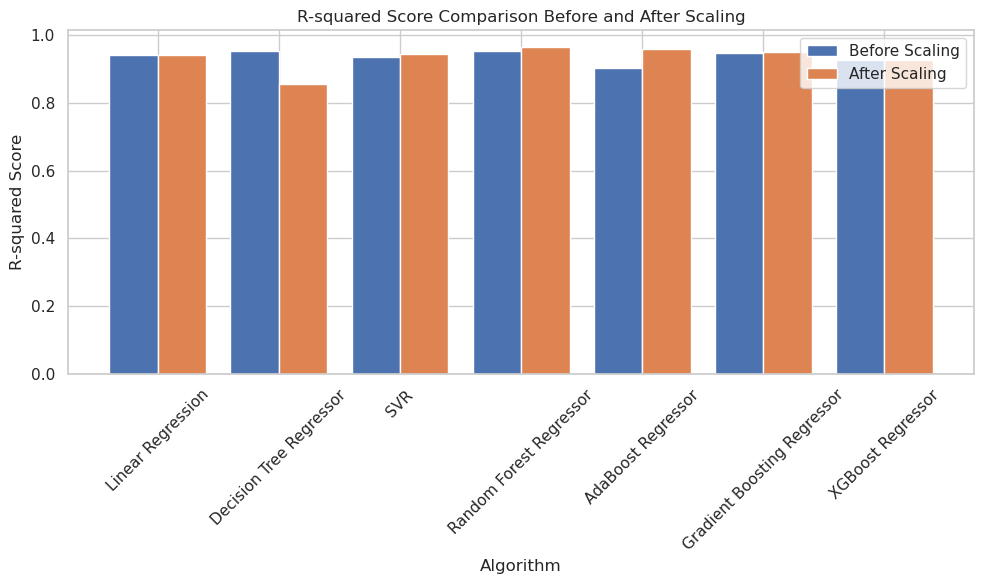

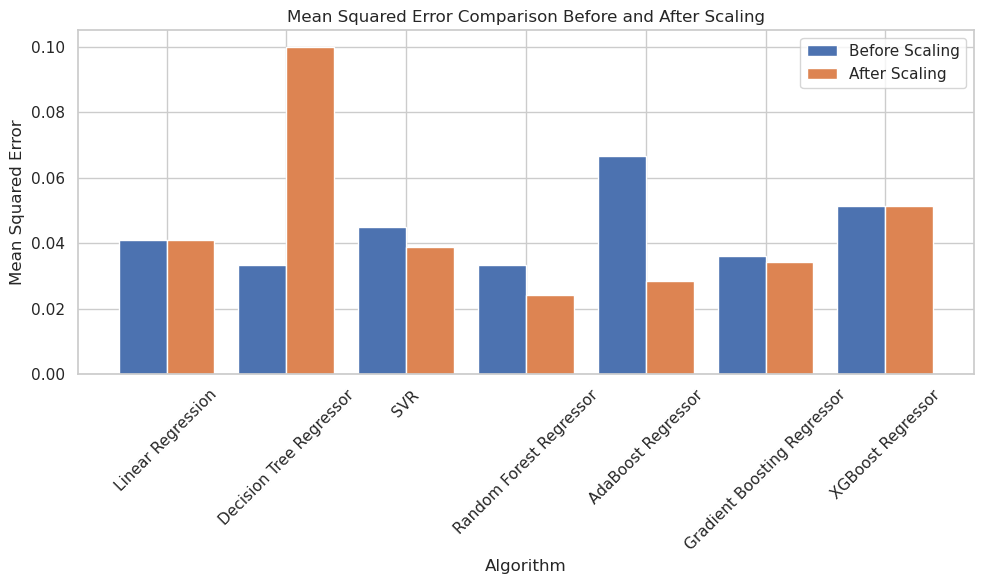

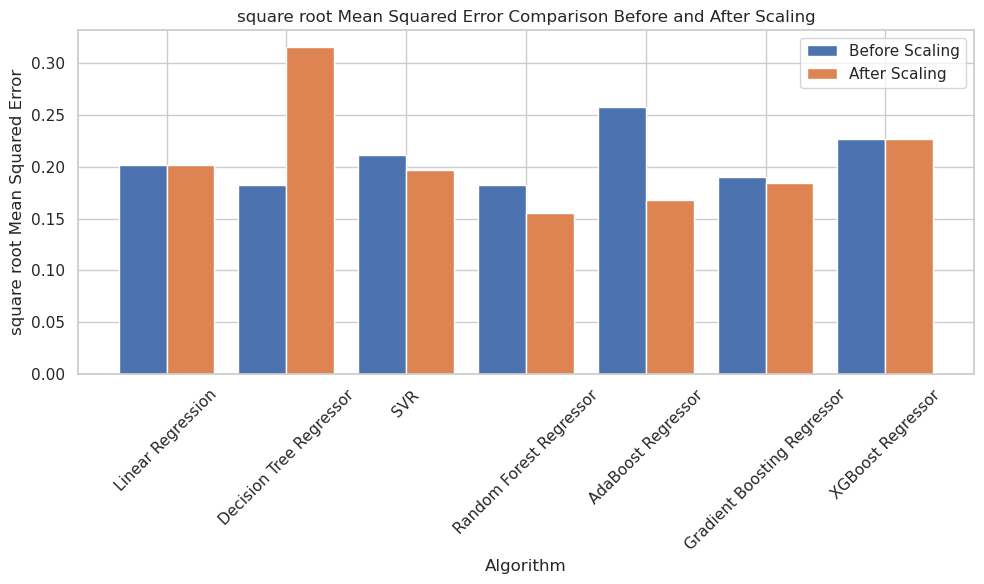

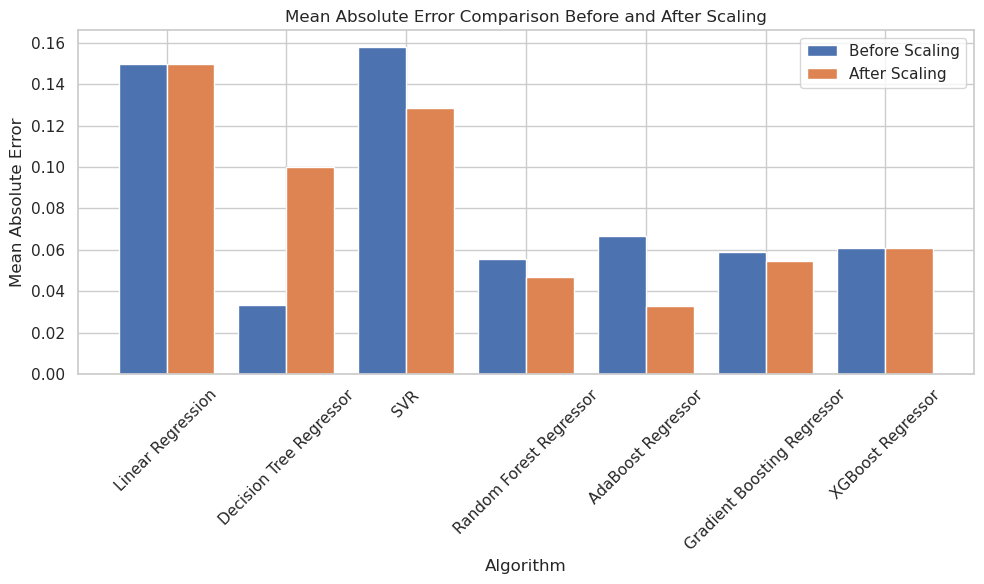

In [306]:
import matplotlib.pyplot as plt
import numpy as np

# Data before scaling
r2_scores_before = scores_df['r2_score']
mse_before = scores_df['mse']
mae_before = scores_df['mae']
rmse_before = scores_df['sqrt_of_mse']
# Data after scaling
r2_scores_after = scal_scores_df['r2_score']
mse_after =scal_scores_df['mse']
mae_after = scal_scores_df['mae']
rmse_after = scal_scores_df['sqrt_of_mse']
# Create a list of algorithm names
algorithms = list(regression_models.keys())

# Create an array for the x-axis positions
x_positions = np.arange(len(algorithms))

# Plotting the R-squared scores before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, r2_scores_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, r2_scores_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Mean Squared Errors before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, mse_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, mse_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()


# Plotting the square root of Mean Squared Errors before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, rmse_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, rmse_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('square root Mean Squared Error')
plt.title('square root Mean Squared Error Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Mean Absolute Errors before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, mae_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, mae_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()


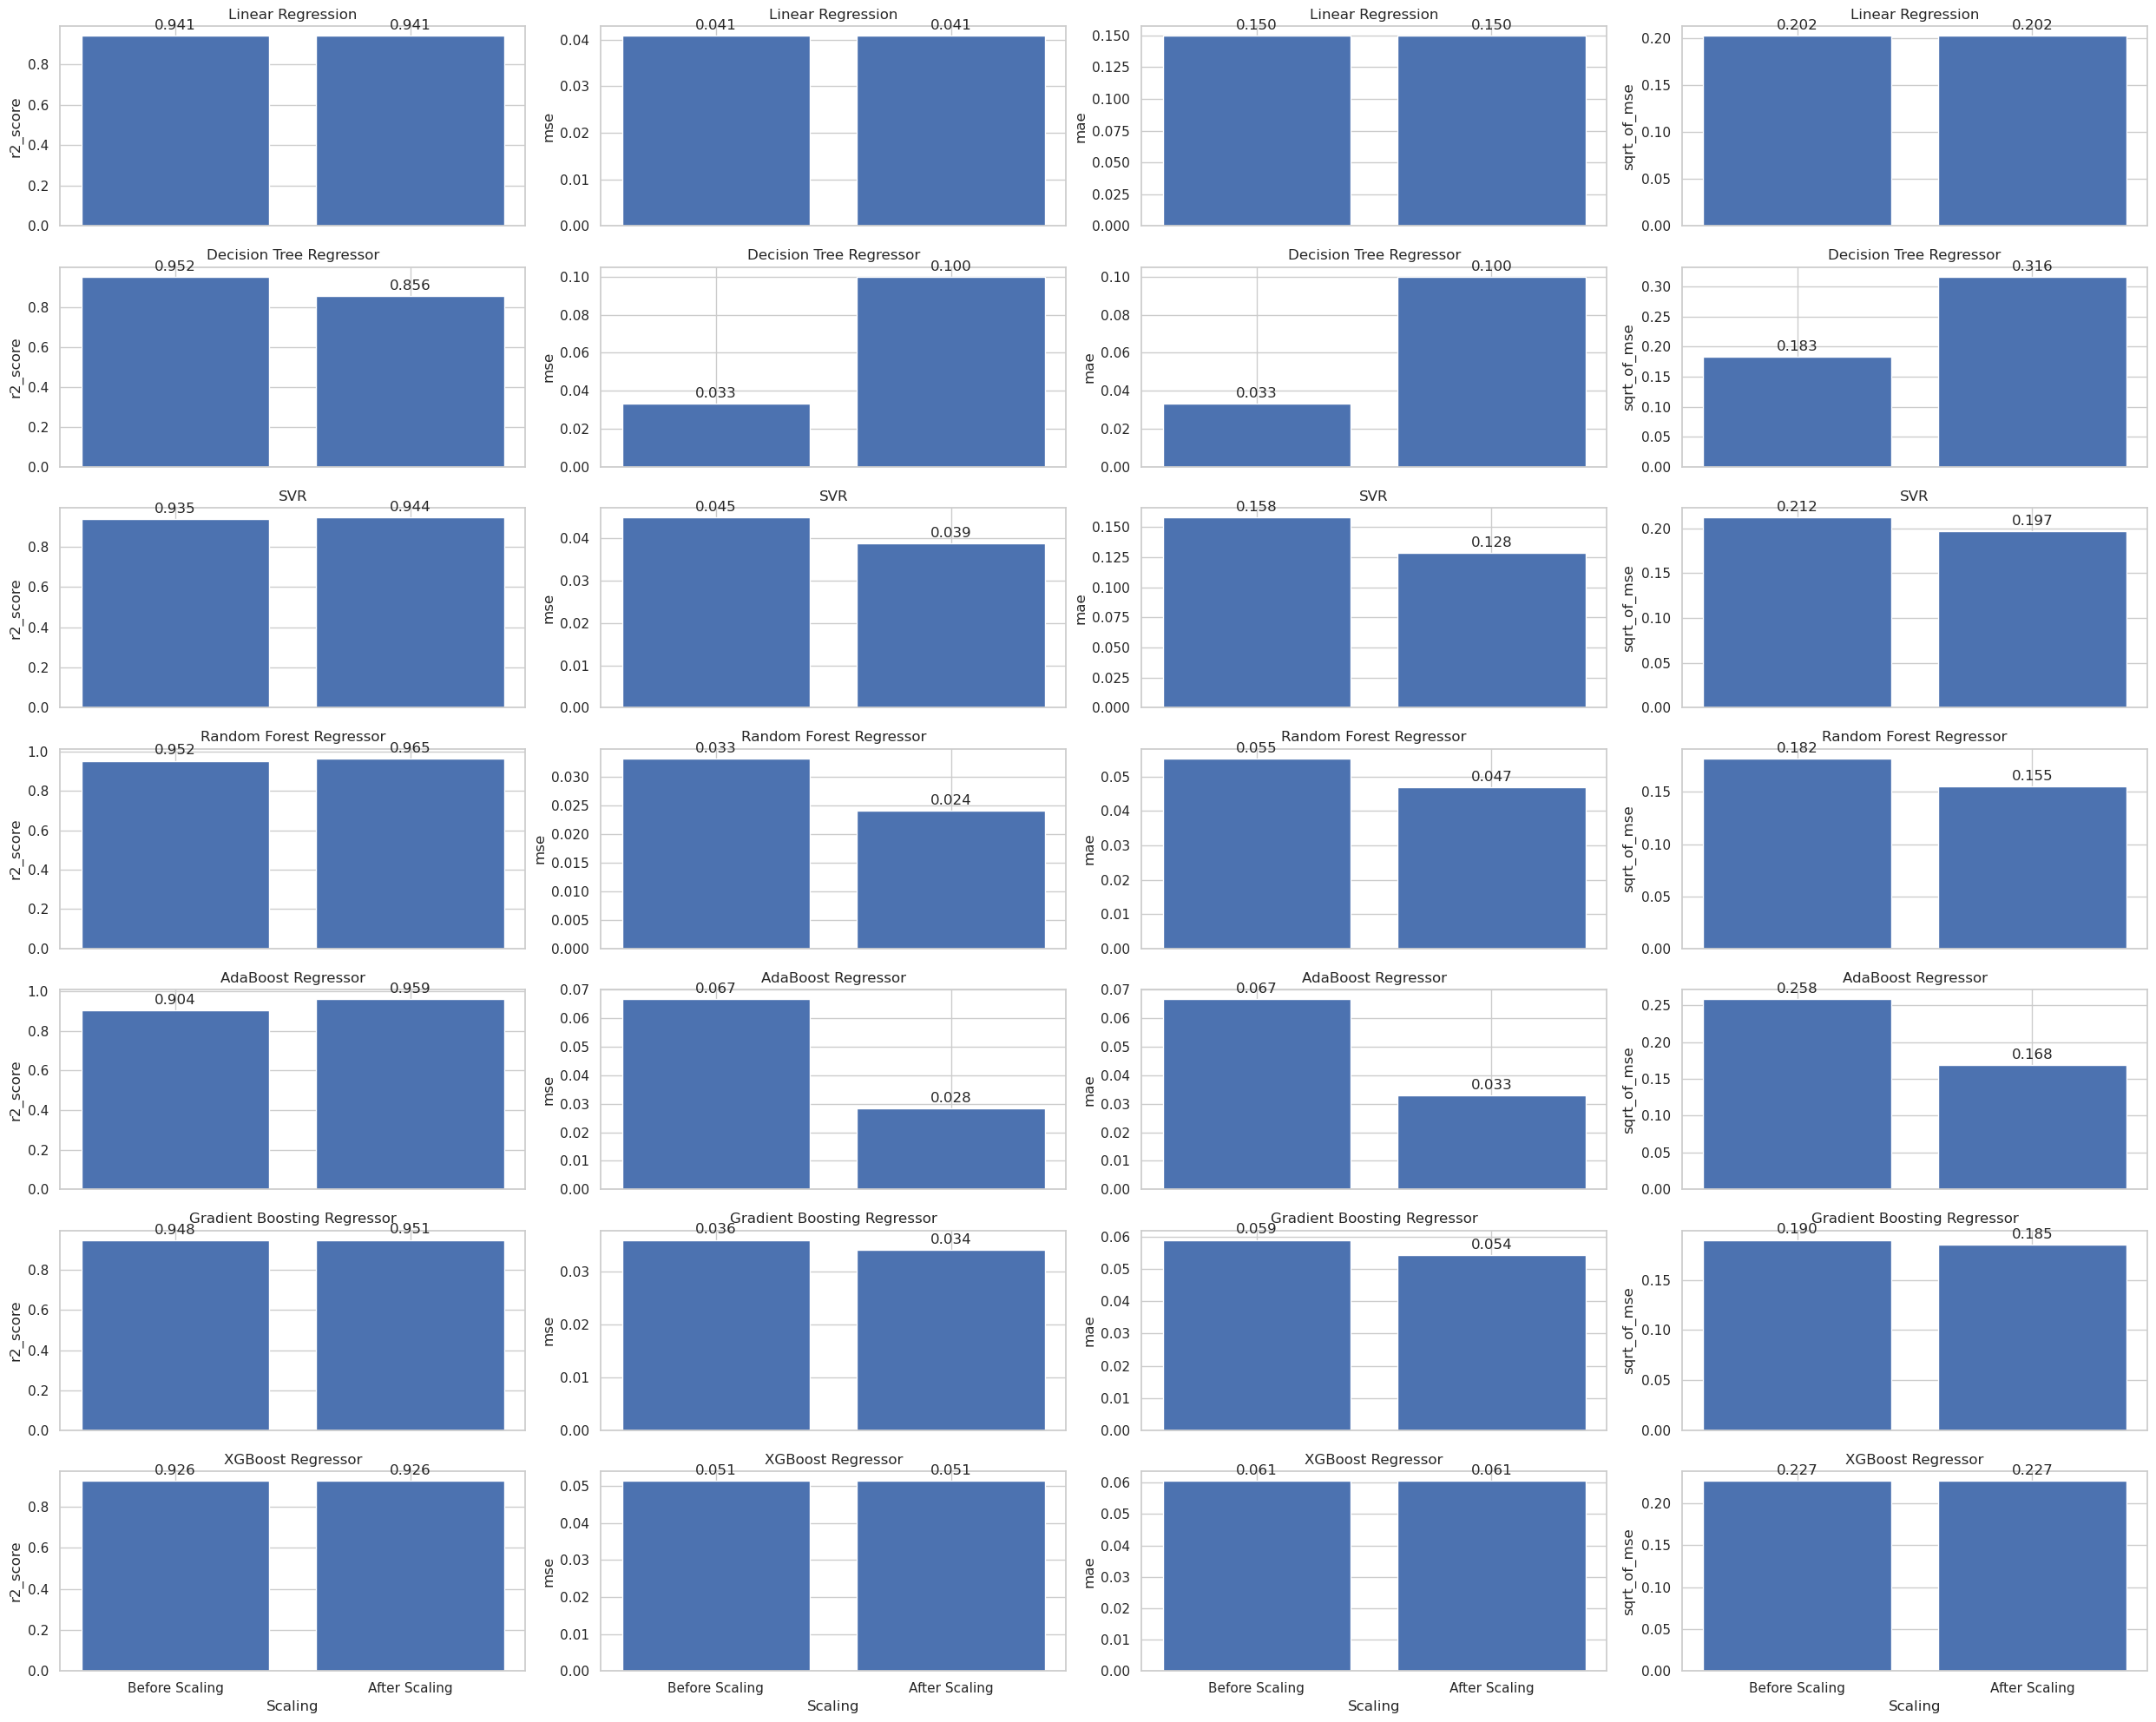

In [317]:
# List of metrics to plot
metrics = ['r2_score', 'mse', 'mae', 'sqrt_of_mse']

# Create subplots
fig, axes = plt.subplots(nrows=len(scores_df), ncols=len(metrics), figsize=(25, 20), sharex=True)

# Iterate through each algorithm
for idx, algorithm in enumerate(scores_df['Algorithm']):
    # Filter data for the selected algorithm
    selected_algorithm_scores = scores_df[scores_df['Algorithm'] == algorithm]
    selected_scaling_scores = scal_scores_df[scal_scores_df['Algorithm'] == algorithm]

    # Plot for each metric
    for i, metric in enumerate(metrics):
        bars = axes[idx, i].bar([0, 1], [selected_algorithm_scores[metric].values[0], selected_scaling_scores[metric].values[0]], tick_label=['Before Scaling', 'After Scaling'])
        axes[idx, i].set_title(f"{algorithm}")
        if idx == len(scores_df) - 1:
            axes[idx, i].set_xlabel("Scaling")
        axes[idx, i].set_ylabel(metric)

        # Add actual scores above the bars
        for bar in bars:
            height = bar.get_height()
            axes[idx, i].annotate(f"{height:.3f}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()